In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import math

import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
def schedule(epoch, lr) -> float:
    if epoch > 200 and epoch % 50 == 0:
        return lr * math.exp(-0.1)
    return lr
scheduler = LearningRateScheduler(schedule)

In [3]:
train_X = {}
train_y = {}

test_X = {}
test_y = {}

history = {}

noise_levels = [0, 1, 2, 3, 5, 8]

In [ ]:
for n in noise_levels:
    filename = f'm{n}'
    from utils import load_dataset

    X_train[n], y_train[n], X_test[n], y_test[n] = load_dataset(filename)

In [5]:
model = Sequential([
                    LSTM(16, input_shape=(4, 1000)),
                    Dense(64, activation='relu'),
                    Dense(1, activation='relu')
])
optimizer = Adam()
model.compile(optimizer=optimizer, loss='mae')

In [8]:
epochs = 200

In [ ]:
for noise in noise_levels:
    clear_session()
    history[noise] = model.fit(train_X[noise][:],
                        train_y[noise][:],
                        epochs=epochs,
                        callbacks=[scheduler]
    )
    model.save(f'tests/lstm-{noise}-model.h5')
    print(f'finished training {noise} model and saved')

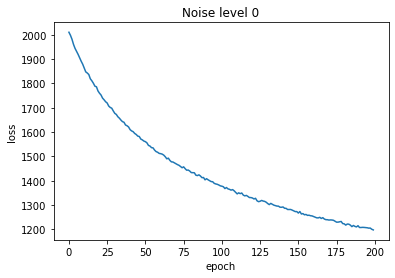

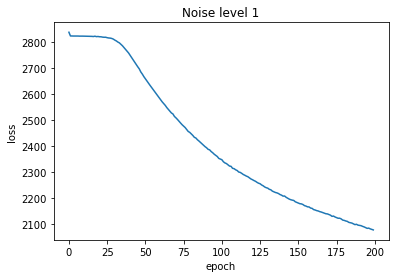

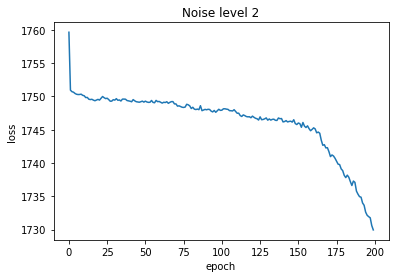

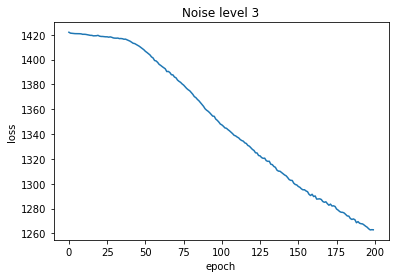

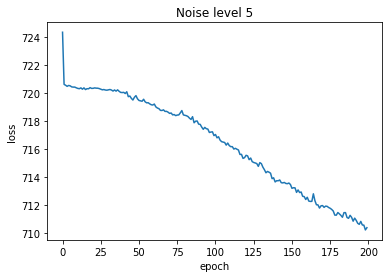

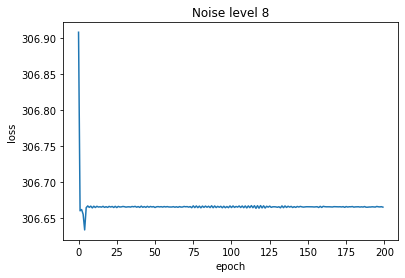

In [11]:
for noise in noise_levels:
    plt.title(f'Noise level {noise}')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(range(epochs), history[noise].history['loss'])
    plt.show()